In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

folder_path = '/content/drive/MyDrive/Geochem_data_060'

selected_columns = [
    'Ag_ppm', 'Al_pct', 'As_ppm', 'Au_ppm', 'B_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Br_ppm',
    'C_pct', 'Ca_pct', 'Cd_ppm', 'Ce_ppm', 'Cl_pct', 'Co_ppm', 'Cr_ppm', 'Cs_ppm', 'Cu_ppm',
    'Dy_ppm', 'Er_ppm', 'Eu_ppm', 'F_pct', 'Fe_pct', 'Ga_ppm', 'Gd_ppm', 'Ge_ppm', 'Hf_ppm',
    'Hg_ppm', 'Ho_ppm', 'In_ppm', 'Ir_ppm', 'K_pct', 'La_ppm', 'Li_ppm', 'Lu_ppm', 'Mg_pct',
    'Mn_pct', 'Mo_ppm', 'Na_pct', 'Nb_ppm', 'Nd_ppm', 'Ni_ppm', 'P_pct', 'Pb_ppm', 'Pd_ppm',
    'Pr_ppm', 'Pt_ppm', 'Rb_ppm', 'Re_ppm', 'Rh_ppm', 'Ru_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm',
    'Se_ppm', 'Si_pct', 'Sm_ppm', 'Sn_ppm', 'Sr_ppm', 'Ta_ppm', 'Tb_ppm', 'Te_ppm', 'Th_ppm',
    'Ti_pct', 'Tl_ppm', 'Tm_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Y_ppm', 'Yb_ppm', 'Zn_ppm', 'Zr_ppm'
]

all_data = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        if 'DEPOSIT_TYPE' in df.columns:
            all_data.append(df)

data = data.groupby('DEPOSIT_TYPE', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))



features_ml = data[selected_columns]
target_ml = data['DEPOSIT_TYPE']

label_encoders = {}
for col in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

features = features.fillna(features.mean())


X_train_ml, X_temp_ml, y_train_ml, y_temp_ml = train_test_split(features_ml, target_ml, test_size=0.2, random_state=42)
X_test_ml, X_val_ml, y_test_ml, y_val_ml = train_test_split(X_temp_ml, y_temp_ml, test_size=0.5, random_state=42)


target_encoder_ml = LabelEncoder()
y_train_ml_encoded = target_encoder_ml.fit_transform(y_train_ml)


y_test_ml = y_test_ml[y_test_ml.isin(target_encoder_ml.classes_)]
X_test_ml = X_test_ml.loc[y_test_ml.index]
y_test_ml_encoded = target_encoder_ml.transform(y_test_ml)

y_val_ml = y_val_ml[y_val_ml.isin(target_encoder_ml.classes_)]
X_val_ml = X_val_ml.loc[y_val_ml.index]
y_val_ml_encoded = target_encoder_ml.transform(y_val_ml)

clf_ml = DecisionTreeClassifier(random_state=42)
clf_ml.fit(X_train_ml, y_train_ml_encoded)


y_pred_ml = clf_ml.predict(X_test_ml)
test_acc_ml = accuracy_score(y_test_ml_encoded, y_pred_ml)
print(f"✅ Test Accuracy (ML): {test_acc_ml:.4f}")
print("📊 Classification Report (Test Set - ML):")
print(classification_report(
    y_test_ml_encoded,
    y_pred_ml,
    target_names=target_encoder_ml.inverse_transform(np.unique(y_test_ml_encoded))
))

y_val_pred_ml = clf_ml.predict(X_val_ml)
val_acc_ml = accuracy_score(y_val_ml_encoded, y_val_pred_ml)
print(f"✅ Validation Accuracy (ML): {val_acc_ml:.4f}")
print("📊 Classification Report (Validation Set - ML):")

val_labels_ml = np.unique(np.concatenate([y_val_ml_encoded, y_val_pred_ml]))

print(classification_report(
    y_val_ml_encoded,
    y_val_pred_ml,
    labels=val_labels_ml,
    target_names=target_encoder_ml.inverse_transform(val_labels_ml)
))

importances_ml = pd.Series(clf_ml.feature_importances_, index=features_ml.columns).sort_values(ascending=False)
print("\n🌟 Feature Importances (ML):")
print(importances_ml.head(20))

✅ Test Accuracy (ML): 0.8929
📊 Classification Report (Test Set - ML):
                                                 precision    recall  f1-score   support

                                    Carbonatite       0.85      1.00      0.92        11
                         High sulfidation Au-Ag       0.42      0.62      0.50         8
                    High sulfidation Au-Ag (Cu)       0.67      0.67      0.67         3
        Lithocap alunite/High sulfidation Au-Ag       0.88      0.64      0.74        11
      Lithocap kaolinite/High sulfidation Au-Ag       1.00      0.86      0.92         7
                             Low sulfidation Au       0.88      0.88      0.88         8
                          Low sulfidation Au-Ag       1.00      0.86      0.92         7
               Low sulfidation epithermal Au-Ag       1.00      1.00      1.00        14
                     Polymetallic sulfide skarn       0.67      0.40      0.50         5
         Polymetallic sulfide skarn/rep

/tmp/ipython-input-17-3823499569.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('DEPOSIT_TYPE', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sample

nsai with api

In [ ]:
!pip install openai


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import getpass
from openai import OpenAI
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

csv_folder = '/content/drive/MyDrive/Geochem_data_060'
json_folder = '/content/drive/MyDrive/Geochem_Knowledge_060'

api_key = getpass.getpass("🔐 Enter your OpenAI API key: ")
client = OpenAI(api_key=api_key)

selected_columns = [  # geochemical features
    'Ag_ppm', 'Al_pct', 'As_ppm', 'Au_ppm', 'B_ppm', 'Ba_ppm', 'Be_ppm', 'Bi_ppm', 'Br_ppm',
    'C_pct', 'Ca_pct', 'Cd_ppm', 'Ce_ppm', 'Cl_pct', 'Co_ppm', 'Cr_ppm', 'Cs_ppm', 'Cu_ppm',
    'Dy_ppm', 'Er_ppm', 'Eu_ppm', 'F_pct', 'Fe_pct', 'Ga_ppm', 'Gd_ppm', 'Ge_ppm', 'Hf_ppm',
    'Hg_ppm', 'Ho_ppm', 'In_ppm', 'Ir_ppm', 'K_pct', 'La_ppm', 'Li_ppm', 'Lu_ppm', 'Mg_pct',
    'Mn_pct', 'Mo_ppm', 'Na_pct', 'Nb_ppm', 'Nd_ppm', 'Ni_ppm', 'P_pct', 'Pb_ppm', 'Pd_ppm',
    'Pr_ppm', 'Pt_ppm', 'Rb_ppm', 'Re_ppm', 'Rh_ppm', 'Ru_ppm', 'S_pct', 'Sb_ppm', 'Sc_ppm',
    'Se_ppm', 'Si_pct', 'Sm_ppm', 'Sn_ppm', 'Sr_ppm', 'Ta_ppm', 'Tb_ppm', 'Te_ppm', 'Th_ppm',
    'Ti_pct', 'Tl_ppm', 'Tm_ppm', 'U_ppm', 'V_ppm', 'W_ppm', 'Y_ppm', 'Yb_ppm', 'Zn_ppm', 'Zr_ppm'
]

all_data = []
for file in os.listdir(csv_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(csv_folder, file))
        if 'DEPOSIT_TYPE' in df.columns:
            all_data.append(df)
data = pd.concat(all_data, ignore_index=True)

data = data.groupby('DEPOSIT_TYPE', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))

def get_embedding(text, model="text-embedding-3-small"):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding

# deposit_type ➝ knowledge text ➝ embedding
knowledge_embeddings = {}
for file in os.listdir(json_folder):
    if file.endswith(".json"):
        deposit_type = file.replace("_knowledge.json", "").strip()
        file_path = os.path.join(json_folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            raw = f.read().strip()
            if not raw:
                print(f"⚠️ Skipped empty file: {file}")
                continue
            try:
                try:
                    parsed = json.loads(raw)
                    knowledge_text = json.dumps(parsed) if isinstance(parsed, dict) else str(parsed)
                except json.JSONDecodeError:
                    knowledge_text = raw
                embedding = get_embedding(knowledge_text)
                knowledge_embeddings[deposit_type] = embedding
            except Exception as e:
                print(f"❌ Error embedding {file}: {e}")


features_nsai = data[selected_columns].copy()
target_nsai = data['DEPOSIT_TYPE']

for col in features_nsai.select_dtypes(include='object').columns:
    le = LabelEncoder()
    features_nsai[col] = le.fit_transform(features_nsai[col])

features_nsai = features_nsai.fillna(features_nsai.mean())

# symbolic knowledge embedding
def get_symbolic_vector(deposit_type):
    return knowledge_embeddings.get(deposit_type, [0]*1536)

symbolic_vectors_nsai = np.vstack([get_symbolic_vector(dt) for dt in target_nsai])
X_nsai = np.hstack([features_nsai.values, symbolic_vectors_nsai])
y_nsai = target_nsai

X_train_nsai, X_temp_nsai, y_train_nsai, y_temp_nsai = train_test_split(X_nsai, y_nsai, test_size=0.2, random_state=42)
X_test_nsai, X_val_nsai, y_test_nsai, y_val_nsai = train_test_split(X_temp_nsai, y_temp_nsai, test_size=0.5, random_state=42)

target_encoder_nsai = LabelEncoder()
y_train_nsai_encoded = target_encoder_nsai.fit_transform(y_train_nsai)

y_test_nsai = y_test_nsai[y_test_nsai.isin(target_encoder_nsai.classes_)]
X_test_nsai = X_test_nsai[[i for i in range(len(y_test_nsai))]]
y_test_nsai_encoded = target_encoder_nsai.transform(y_test_nsai)

y_val_nsai = y_val_nsai[y_val_nsai.isin(target_encoder_nsai.classes_)]
X_val_nsai = X_val_nsai[[i for i in range(len(y_val_nsai))]]
y_val_nsai_encoded = target_encoder_nsai.transform(y_val_nsai)

clf_nsai = DecisionTreeClassifier(random_state=42)
clf_nsai.fit(X_train_nsai, y_train_nsai_encoded)

y_pred_nsai = clf_nsai.predict(X_test_nsai)
print(f"✅ Test Accuracy (NSAI): {accuracy_score(y_test_nsai_encoded, y_pred_nsai):.4f}")
print("📊 Classification Report (Test Set - NSAI):")
print(classification_report(
    y_test_nsai_encoded,
    y_pred_nsai,
    target_names=target_encoder_nsai.inverse_transform(np.unique(y_test_nsai_encoded)),
    zero_division=0
))

y_val_pred_nsai = clf_nsai.predict(X_val_nsai)
val_acc_nsai = accuracy_score(y_val_nsai_encoded, y_val_pred_nsai)
print(f"✅ Validation Accuracy (NSAI): {val_acc_nsai:.4f}")
print("📊 Classification Report (Validation Set - NSAI):")
val_labels_nsai = np.unique(np.concatenate([y_val_nsai_encoded, y_val_pred_nsai]))
print(classification_report(
    y_val_nsai_encoded,
    y_val_pred_nsai,
    labels=val_labels_nsai,
    target_names=target_encoder_nsai.inverse_transform(val_labels_nsai),
    zero_division=0
))

geochem_features_nsai = selected_columns
embedding_features_nsai = [f'K{i}' for i in range(1536)]
all_feature_names_nsai = geochem_features_nsai + embedding_features_nsai

importances_nsai = pd.Series(clf_nsai.feature_importances_, index=all_feature_names_nsai).sort_values(ascending=False)
print("\n🌟 Feature Importances (NSAI):")
print(importances_nsai.head(20))

🔐 Enter your OpenAI API key: ··········


/tmp/ipython-input-18-3643641390.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('DEPOSIT_TYPE', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))


✅ Test Accuracy (NSAI): 0.9643
📊 Classification Report (Test Set - NSAI):
                                                 precision    recall  f1-score   support

                                    Carbonatite       1.00      1.00      1.00        11
                         High sulfidation Au-Ag       1.00      1.00      1.00         8
                    High sulfidation Au-Ag (Cu)       1.00      1.00      1.00         3
        Lithocap alunite/High sulfidation Au-Ag       0.75      0.82      0.78        11
      Lithocap kaolinite/High sulfidation Au-Ag       0.80      0.57      0.67         7
                             Low sulfidation Au       1.00      1.00      1.00         8
                          Low sulfidation Au-Ag       1.00      1.00      1.00         7
               Low sulfidation epithermal Au-Ag       1.00      1.00      1.00        14
                     Polymetallic sulfide skarn       1.00      1.00      1.00         5
         Polymetallic sulfide skarn

ShAP值分析

In [ ]:
!pip install shap


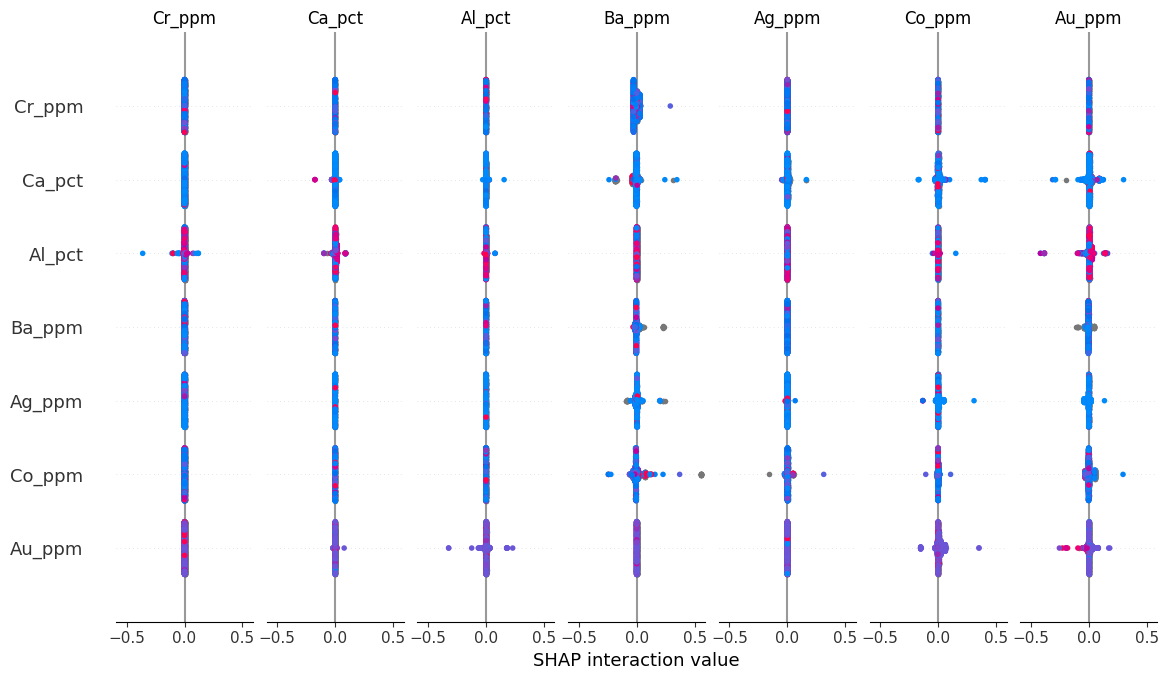

In [ ]:
import shap

explainer_ml = shap.TreeExplainer(clf_ml)

shap_values_ml = explainer_ml.shap_values(X_train_ml)

shap.summary_plot(shap_values_ml, X_train_ml, feature_names=features_ml.columns)


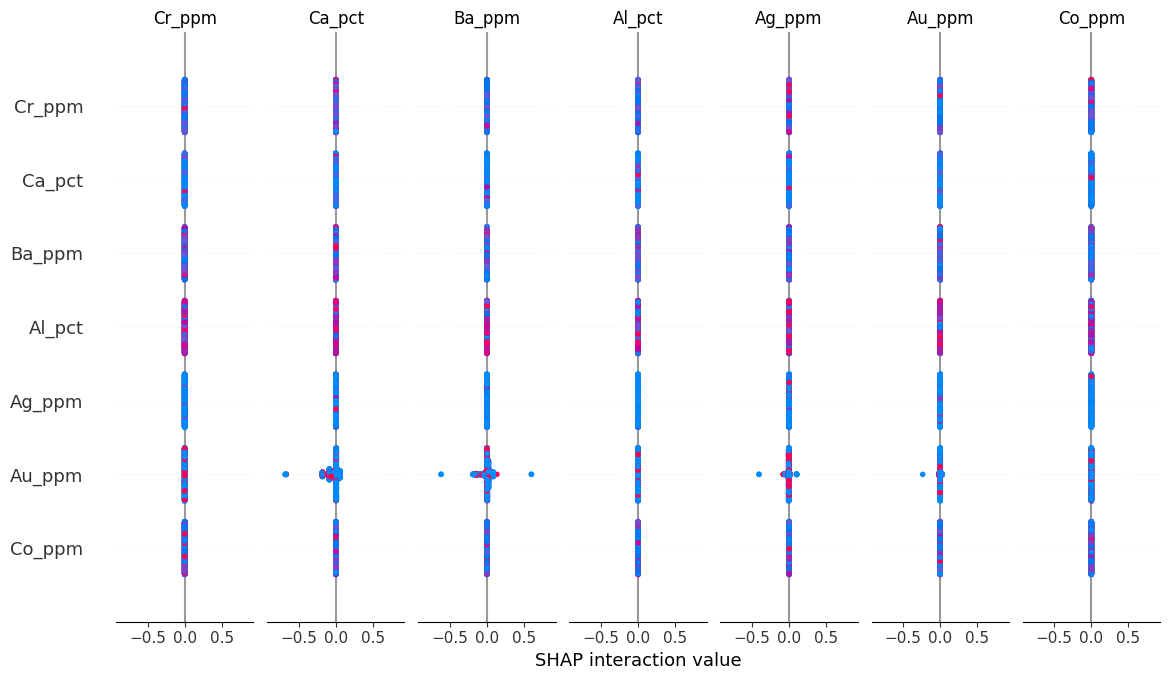

In [ ]:
explainer_nsai = shap.TreeExplainer(clf_nsai)

shap_values_nsai = explainer_nsai.shap_values(X_train_nsai)

all_feature_names_nsai = geochem_features_nsai + [f'K{i}' for i in range(1536)]

# shap summary plot
shap.summary_plot(shap_values_nsai, X_train_nsai, feature_names=all_feature_names_nsai)


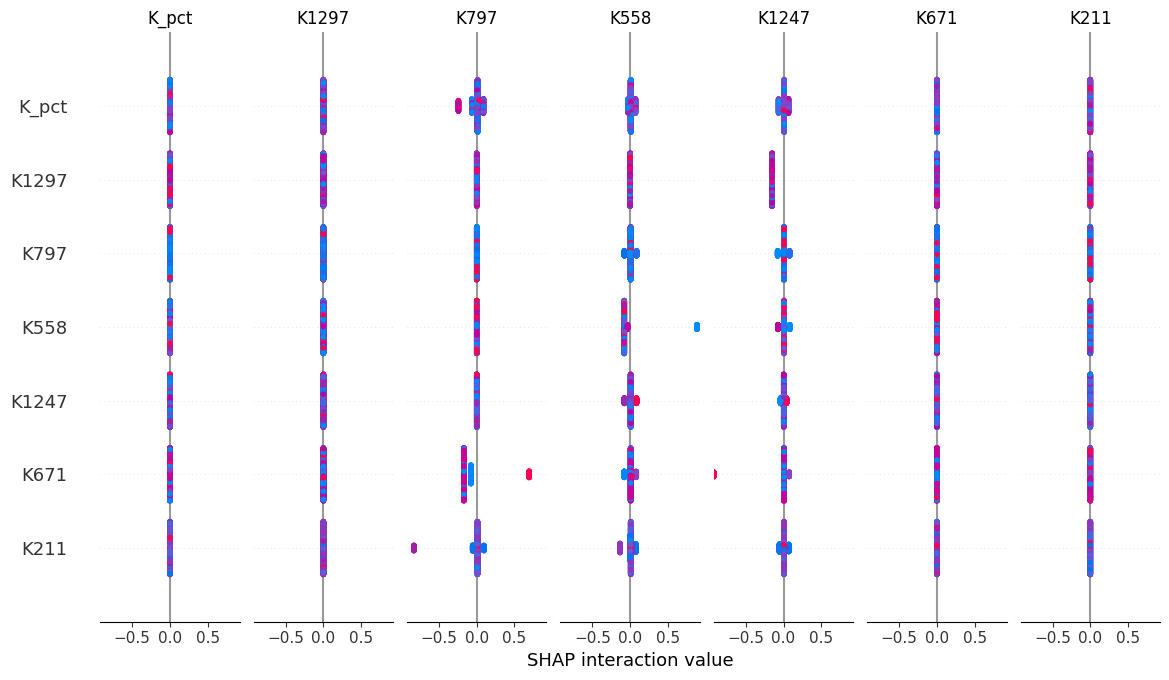

In [ ]:
top_k = 20
importances = pd.Series(clf_nsai.feature_importances_, index=all_feature_names)
top_features = importances.nlargest(top_k).index.tolist()

X_plot = X_train_nsai[:, [all_feature_names.index(f) for f in top_features]]
shap_values_plot = shap_values_nsai[:, [all_feature_names.index(f) for f in top_features]]

shap.summary_plot(shap_values_plot, X_plot, feature_names=top_features)
